# Plots in the Latest Version of the Manuscript

[![Manuscript Version](https://img.shields.io/badge/version-4.0-red?style=for-the-badge)](https://doi.org/10.1103/PhysRevA.106.043501)
[![Toolbox Version](https://img.shields.io/badge/qom-v1.0.1-red?style=for-the-badge)](https://sampreet.github.io/qom-docs/v1.0.1)

## Dependencies

In [1]:
# dependencies
import numpy as np
import os
import sys

# qom modules
from qom.solvers.deterministic import HLESolver
from qom.solvers.measure import QCMSolver, get_Wigner_distributions_single_mode
from qom.ui import init_log
from qom.ui.plotters import MPLPlotter
from qom.utils.loopers import wrap_looper

# add path to local libraries
sys.path.append(os.path.abspath(os.path.join('../..')))
# import system
from systems.OptoElectroMechanical import OEM_20

# initialize logger
init_log()

MainThread               INFO    2023-07-13 18:02:21.579: (qom.ui.log) -------------------------------------------------Logger Initialized


## Figure 2

Time evolution of mechanical squeezing (red or light gray) and optoelectrical entanglement (blue or dark gray) in the presence of (a) only the laser modulation (dotted), (b) laser and spring constant modulation (dashed), (c) laser and voltage modulation (dashed dotted), and (d) all three types of modulations (solid).
The thin dashed black line represents the SQL for the mechanical variance.
The shaded regions represent high values of squeezing entanglement.
Other parameters (in units of $\omega_{b0}$) are $A_{l0} = 100$, $A_{l\pm} = 10$, $A_{v0} = 50$, $A_{v1} = 100$, $\Delta_{0} = 1$, $\gamma_{a} = 0.1$, $\gamma_{b} = 10^{−6}$, $\gamma_{c} = 10^{−2}$,
$g_{ab} = 10^{−3}$, $g_{bc} = 2 \times 10^{−4}$, $\Omega_{l} = 2$, $\Omega_{v} = 2$, $\Omega_{s} = 2$, $\omega_{c0} = 1.1$ and $\theta = 0.5$.

MainThread               INFO    2023-07-13 18:02:23.771: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2023-07-13 18:02:23.777: (qom.solvers.QCMSolver) ---------------------------------------Measures Obtained	


0.44403837502519167 0.03579924497056362


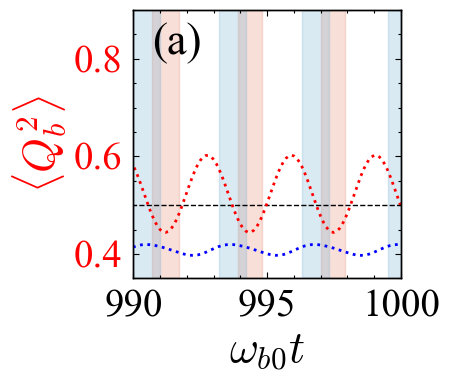

MainThread               INFO    2023-07-13 18:02:26.778: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2023-07-13 18:02:26.784: (qom.solvers.QCMSolver) ---------------------------------------Measures Obtained	


0.39684602036573036 0.0331780116071503


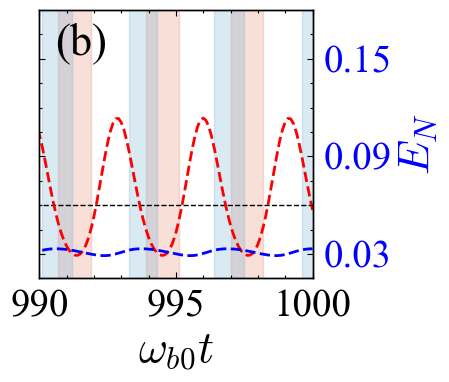

MainThread               INFO    2023-07-13 18:02:29.428: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2023-07-13 18:02:29.434: (qom.solvers.QCMSolver) ---------------------------------------Measures Obtained	


0.40547667053717185 0.124279931308093


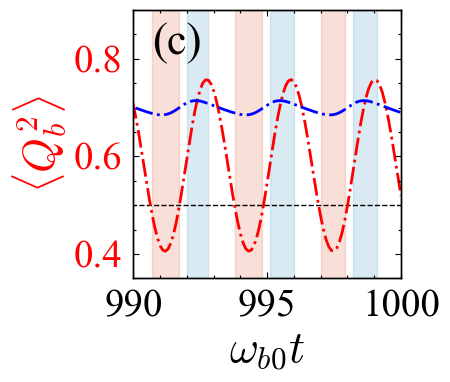

MainThread               INFO    2023-07-13 18:02:32.331: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2023-07-13 18:02:32.337: (qom.solvers.QCMSolver) ---------------------------------------Measures Obtained	


0.36541001674095513 0.12810831429078764


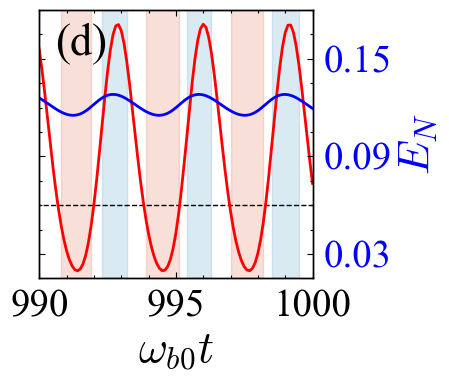

In [2]:
# variables
annotation_texts = ['(a)', '(b)', '(c)', '(d)']
annotation_xs = [0.33, 0.12, 0.33, 0.12]
styles = [':', '--', '-.', '-']

# all parameters
params = {
    'solver': {
        'show_progress': True,
        'cache': False,
        'measure_codes': ['entan_ln'],
        'indices': (0, 2),
        'ode_method': 'vode',
        't_min': 0.0,
        't_max': 1000.0,
        't_dim': 10001,
        't_index_min': 9371,
        't_index_max': 10001
    },
    'system': {
        'A_ls': [100.0, 10.0, 10.0],
        'A_vs': [50.0, 50.0, 50.0],
        'Delta_0': 1.0,
        'gammas': [0.1, 1e-6, 1e-2],
        'gs': [1e-3, 2e-4],
        'n_ths': [0.0, 0.0],
        'Omegas': [2.0, 2.0, 2.0],
        'omega_c0': 1.1,
        'theta': 0.5,
        't_mod': 'cos',
        't_pos': 'top'
    },
    'plotter': {
        'type': 'line',
        'colors': ['k', 'r', 'b'],
        'sizes': [1, 2, 2],
        'x_label': '$\\omega_{b0} t$',
        'x_ticks': [990, 995, 1000],
        'x_ticks_minor': [990 + i for i in range(11)],
        'v_label_color': 'r',
        'v_limits': [0.35, 0.9],
        'v_tick_color': 'r',
        'v_tick_position': 'left-in',
        'v_ticks': [0.4, 0.6, 0.8],
        'v_ticks_minor': [0.35 + i * 0.05 for i in range(13)],
        'v_twin_label_color': 'b',
        'v_twin_limits': [0.015, 0.18],
        'v_twin_tick_color': 'b',
        'v_twin_tick_position': 'right-in',
        'v_twin_ticks': [0.03, 0.09, 0.15],
        'v_twin_ticks_minor': [0.015 + i * 0.015 for i in range(13)],
        'label_font_size': 32,
        'tick_font_size': 28,
        'width': 4.6,
        'height': 4.0
    }
}

# initialize logger
init_log()

for j in range(4):
    # update sytem params
    params['system']['A_vs'] = [50.0, 0.0, 0.0] if int(j / 2) == 0 else [50.0, 50.0, 50.0]
    params['system']['theta'] = 0.0 if j % 2 == 0 else 0.5

    # initialize system
    system = OEM_20(
        params=params['system']
    )

    # initialize solver
    hle_solver = HLESolver(
        system=system,
        params=params['solver']
    )
    # get times, modes and correlations
    T = hle_solver.get_times()
    Modes = hle_solver.get_modes()
    Corrs = hle_solver.get_corrs()
    # get quantum correlation measures
    Measures = QCMSolver(
        Modes=Modes,
        Corrs=Corrs,
        params=params['solver']
    ).get_measures()
    # extract correlation
    M_0 = Corrs[:, 2, 2]
    # extract entanglement
    M_1 = Measures[:, 0]
    # output maximum squeezing and entanglement
    print(np.min(M_0), np.max(M_1))

    # update plotter params
    params['plotter']['styles'] = ['--', styles[j], styles[j]]
    params['plotter']['v_tick_labels'] = [0.4, 0.6, 0.8] if j % 2 == 0 else [''] * 3
    params['plotter']['v_label'] = '$\\langle Q_{b}^{2} \\rangle$' if j % 2 == 0 else ''
    params['plotter']['v_twin_tick_labels'] = [0.03, 0.09, 0.15] if j % 2 == 1 else [''] * 3
    params['plotter']['v_twin_label'] = '$E_{N}$' if j % 2 == 1 else ''
    params['plotter']['annotations'] = [{
        'text': annotation_texts[j],
        'xy': [annotation_xs[j], 0.82]
    }]
    params['plotter']['vertical_spans'] = list()
    # calculate areas near 25% of the minimum variance
    idxs = np.squeeze(np.argwhere(M_0 < np.min(M_0) + 0.25 * (np.max(M_0) - np.min(M_0))))
    jumps = idxs[:-1] != idxs[1:] - 1
    stops = T[idxs][:-1][jumps]
    starts = T[idxs][1:][jumps]
    for i in range(1, len(starts)):
        params['plotter']['vertical_spans'].append({
            'limits': (starts[i], (stops[i + 1] if i < len(stops) - 1 else T[idxs][-1])),
            'color': 8,
            'alpha': 0.25
        })
    # calculate areas near 25% of the maximum entanglement
    idxs = np.squeeze(np.argwhere(M_1 > np.max(M_1) - 0.25 * (np.max(M_1) - np.min(M_1))))
    jumps = idxs[:-1] != idxs[1:] - 1
    stops = T[idxs][:-1][jumps]
    starts = T[idxs][1:][jumps]
    for i in range(1, len(starts)):
        params['plotter']['vertical_spans'].append({
            'limits': (starts[i], (stops[i + 1] if i < len(stops) - 1 else T[idxs][-1])),
            'color': 2,
            'alpha': 0.25
        })

    # plotter
    plotter = MPLPlotter(
        axes={},
        params=params['plotter']
    )
    # plot correlation dynamics
    plotter.update(
        vs=[np.zeros(np.shape(T)) + 0.5, M_0],
        xs=T
    )
    # plot entanglement dynamics
    plotter.update_twin_axis(
        vs=M_1,
        xs=T
    )
    # show
    plotter.show()
    # close
    plotter.close()

Wigner distributions depicting the variation of squeezing with time in the presence of all three modulations.

MainThread               INFO    2023-07-13 18:02:35.317: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2023-07-13 18:02:38.402: (qom.solvers.measure) -----------------------------------------Measures Obtained	


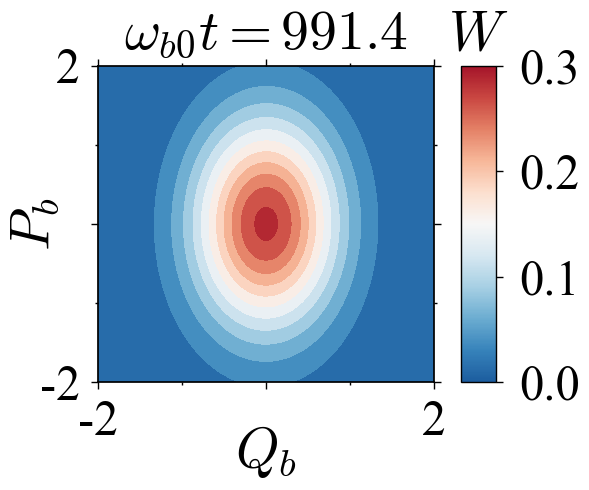

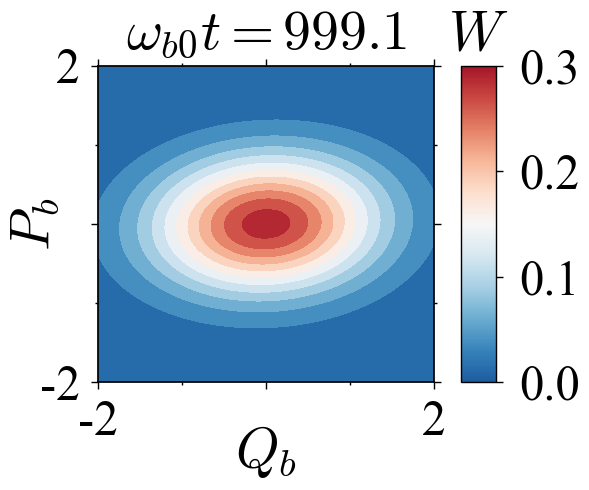

In [3]:
# parameters
params = {
    'solver': {
        'show_progress': True,
        'cache': False,
        'ode_method': 'vode',
        'indices': [1],
        'wigner_xs': np.linspace(-2.0, 2.0, 401),
        'wigner_ys': np.linspace(-2.0, 2.0, 401),
        't_min': 0.0,
        't_max': 1000.0,
        't_dim': 10001,
        't_index_min': 9900,
        't_index_max': 10001
    },
    'system': {
        'A_ls': [100.0, 10.0, 10.0],
        'A_vs': [50.0, 50.0, 50.0],
        'Delta_0': 1.0,
        'gammas': [0.1, 1e-6, 1e-2],
        'gs': [1e-3, 2e-4],
        'n_ths': [0.0, 0.0],
        'Omegas': [2.0, 2.0, 2.0],
        'omega_c0': 1.1,
        'theta': 0.5,
        't_mod': 'cos',
        't_pos': 'top'
    },
    'plotter': {
        'type': 'contourf',
        'title': '$\\omega_{b0} t = 991.4$',
        'x_label': '$Q_{b}$',
        'x_label_pad': -16,
        'x_tick_labels': [-2, '', 2],
        'x_tick_position': 'both-out',
        'x_ticks': [-2, 0, 2],
        'x_ticks_minor': [-2, -1, 0, 1, 2],
        'y_label': '$P_{b}$',
        'y_label_pad': -16,
        'y_tick_labels': [-2, '', 2],
        'y_tick_position': 'both-out',
        'y_ticks': [-2, 0, 2],
        'y_ticks_minor': [-2, -1, 0, 1, 2],
        'show_cbar': True,
        'cbar_title': '$W$',
        'cbar_ticks': [0.0, 0.1, 0.2, 0.3],
        'label_font_size': 40,
        'tick_font_size': 35,
        'title_font_size': 40,
        'width': 5.5
    }
}

# initialize logger
init_log()

# initialize system
system = OEM_20(
    params=params['system']
)

# get correlations and times
hle_solver = HLESolver(
    system=system,
    params=params['solver']
)
T = hle_solver.get_times()
Corrs = hle_solver.get_corrs()
# get Wigner distributions
Wigners = get_Wigner_distributions_single_mode(
    Corrs=Corrs,
    params=params['solver']
)

# plot squeezed Wigners
for i in [14, 91]:
    # update parameters and plot
    params['plotter']['title'] = '$\\omega_{b0} t = ' + str(T[i]) +'$'
    plotter = MPLPlotter(
        axes={
            'X': params['solver']['wigner_xs'],
            'Y': params['solver']['wigner_ys']
        },
        params=params['plotter']
    )
    plotter.update(
        vs=Wigners[i, 0]
    )
    plotter.show()
    plotter.close()

## Figure 3

Maximum squeezing (red or light gray) and entanglement (blue or dark gray) with (a) variation in the voltage modulation frequency in the absence (dashed dotted) and presence (solid) of spring constant modulation, and variation in the (b) modulation amplitude and (c) modulation frequency of the spring constant in the absence (dashed) and presence (solid) of voltage modulation.
The thin dashed black line represents the SQL for the mechanical variance.
Other parameters are the same as in Fig. 2.

MainThread               INFO    2023-07-13 18:02:39.532: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2023-07-13 18:02:39.536: (qom.loopers.XLooper) --------------------------------------------Results Loaded	
MainThread               INFO    2023-07-13 18:02:39.538: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2023-07-13 18:02:39.542: (qom.loopers.XLooper) --------------------------------------------Results Loaded	


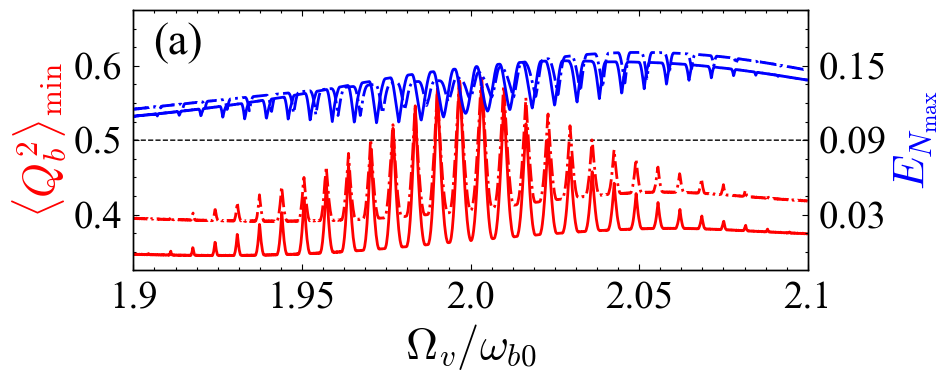

In [4]:
# all parameters
params = {
    'looper': {
        'show_progress': True,
        'X': {
            'var': 'Omegas',
            'idx': 1,
            'min': 1.9,
            'max': 2.1,
            'dim': 2001
        }
    },
    'solver': {
        'show_progress': False,
        'cache': True,
        'measure_codes': ['entan_ln'],
        'indices': (0, 2),
        'ode_method': 'vode',
        't_min': 0.0,
        't_max': 1000.0,
        't_dim': 10001,
        't_index_min': 9371,
        't_index_max': 10001
    },
    'system': {
        'A_ls': [100.0, 10.0, 10.0],
        'A_vs': [50.0, 50.0, 50.0], 
        'Delta_0': 1.0,
        'gammas': [0.1, 1e-6, 1e-2],
        'gs': [1e-3, 2e-4],
        'n_ths': [0.0, 0.0],
        'Omegas': [2.0, 2.0, 2.0],
        'omega_c0': 1.1,
        'theta': 0.5,
        't_mod': 'cos',
        't_pos': 'top'
    },
    'plotter': {
        'type': 'lines',
        'colors': ['k'] + ['r'] * 2 + ['b'] * 2,
        'sizes': [1] + [2] * 4,
        'styles': ['--'] + ['-.', '-'] * 2,
        'x_label': '$\\Omega_{v} / \\omega_{b0}$',
        'x_ticks': [1.9, 1.95, 2.0, 2.05, 2.1],
        'x_ticks_minor': [1.9 + i * 0.00625 for i in range(33)],
        'v_label': '$\\langle Q_{b}^{2} \\rangle_{\\mathrm{min}}$',
        'v_label_color': 'r',
        'v_limits': [0.325, 0.675],
        'v_tick_position': 'left-in',
        'v_ticks': [0.4, 0.5, 0.6],
        'v_ticks_minor': [0.325 + i * 0.025 for i in range(14)],
        'v_twin_label': '$E_{N_{\\mathrm{max}}}$',
        'v_twin_label_color': 'b',
        'v_twin_limits': [-0.015, 0.195],
        'v_twin_tick_position': 'right-in',
        'v_twin_ticks': [0.03, 0.09, 0.15],
        'v_twin_ticks_minor': [i * 0.015 for i in range(14)],
        'label_font_size': 32,
        'tick_font_size': 28,
        'width': 9.6,
        'height': 4.0,
        'annotations': [{
            'text': '(a)',
            'xy': [0.16, 0.82]
        }]
    }
}

# function to obtain squeezing and entanglement
def func(system_params):
    # initialize system
    system = OEM_20(
        params=system_params
    )

    # initialize solver
    hle_solver = HLESolver(
        system=system,
        params=params['solver']
    )
    # get modes and correlations
    Modes, Corrs = hle_solver.get_modes_corrs()
    # get quantum correlation measures
    Measures = QCMSolver(
        Modes=Modes,
        Corrs=Corrs,
        params=params['solver']
    ).get_measures()
    # extract maximum squeezing
    m_0 = np.min(Corrs[:, 2, 2])
    # extract maximum entanglement
    m_1 = np.max(Measures[:, 0])

    # return results as array
    return np.array([m_0, m_1], dtype=np.float_)

# without mechanical frequency modulation
params['looper']['file_path_prefix'] = '../../data/v4.0_qom-v1.0.0/3a_theta=0.0'
params['system']['theta'] = 0.0
looper_0 = wrap_looper(
    looper_name='XLooper',
    func=func,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
Sq_0, En_0 = np.transpose(looper_0.results['V'])

# with mechanical frequency modulation
params['looper']['file_path_prefix'] = '../../data/v4.0_qom-v1.0.0/3a_theta=0.5'
params['system']['theta'] = 0.5
looper_1 = wrap_looper(
    looper_name='XLooper',
    func=func,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
Sq_1, En_1 = np.transpose(looper_1.results['V'])

# plotter
X = looper_0.axes['X']['val']
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
# plot squeezing dynamics
plotter.update(
    vs=[np.zeros(np.shape(X)) + 0.5, Sq_0, Sq_1],
    xs=X
)
# plot entanglement dynamics
plotter.update_twin_axis(
    vs=[En_0, En_1],
    xs=X
)
# show
plotter.show()

MainThread               INFO    2023-07-13 18:02:39.954: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2023-07-13 18:02:39.957: (qom.loopers.XLooper) --------------------------------------------Results Loaded	
MainThread               INFO    2023-07-13 18:02:39.958: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2023-07-13 18:02:39.961: (qom.loopers.XLooper) --------------------------------------------Results Loaded	


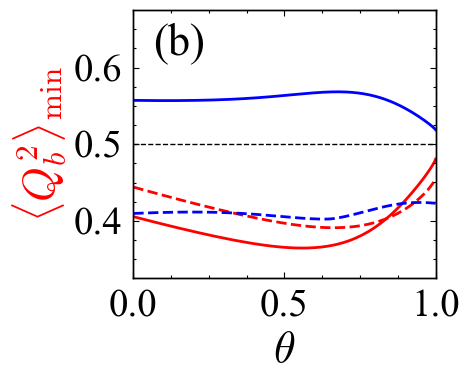

In [5]:
# all parameters
params = {
    'looper': {
        'show_progress': True,
        'X': {
            'var': 'theta',
            'min': 0.0,
            'max': 1.0,
            'dim': 1001
        }
    },
    'solver': {
        'show_progress': False,
        'cache': True,
        'measure_codes': ['entan_ln'],
        'indices': (0, 2),
        'ode_method': 'vode',
        't_min': 0.0,
        't_max': 1000.0,
        't_dim': 10001,
        't_index_min': 9371,
        't_index_max': 10001
    },
    'system': {
        'A_ls': [100.0, 10.0, 10.0],
        'A_vs': [50.0, 50.0, 50.0], 
        'Delta_0': 1.0,
        'gammas': [0.1, 1e-6, 1e-2],
        'gs': [1e-3, 2e-4],
        'n_ths': [0.0, 0.0],
        'Omegas': [2.0, 2.0, 2.0],
        'omega_c0': 1.1,
        'theta': 0.5,
        't_mod': 'cos',
        't_pos': 'top'
    },
    'plotter': {
        'type': 'lines',
        'colors': ['k'] + ['r'] * 2 + ['b'] * 2,
        'sizes': [1] + [2] * 4,
        'styles': ['--'] + ['--', '-'] * 2,
        'x_label': '$\\theta$',
        'x_ticks': [0.5 * i for i in range(3)],
        'x_ticks_minor': [0.125 * i for i in range(9)],
        'x_tick_labels': ['{:0.1f}'.format(0.5 * i) for i in range(3)],
        'v_label': '$\\langle Q_{b}^{2} \\rangle_{\\mathrm{min}}$',
        'v_label_color': 'r',
        'v_limits': [0.325, 0.675],
        'v_tick_position': 'left-in',
        'v_ticks': [0.4, 0.5, 0.6],
        'v_ticks_minor': [0.325 + i * 0.025 for i in range(14)],
        'v_twin_label': '',
        'v_twin_label_color': 'b',
        'v_twin_limits': [-0.015, 0.195],
        'v_twin_tick_labels': [''] * 3,
        'v_twin_tick_position': 'right-in',
        'v_twin_ticks': [0.03, 0.09, 0.15],
        'v_twin_ticks_minor': [i * 0.015 for i in range(14)],
        'label_font_size': 32,
        'tick_font_size': 28,
        'width': 4.8,
        'height': 4.0,
        'annotations': [{
            'text': '(b)',
            'xy': [0.32, 0.82]
        }]
    }
}

# function to obtain squeezing and entanglement
def func(system_params):
    # initialize system
    system = OEM_20(
        params=system_params
    )

    # initialize solver
    hle_solver = HLESolver(
        system=system,
        params=params['solver']
    )
    # get modes and correlations
    Modes, Corrs = hle_solver.get_modes_corrs()
    # get quantum correlation measures
    Measures = QCMSolver(
        Modes=Modes,
        Corrs=Corrs,
        params=params['solver']
    ).get_measures()
    # extract maximum squeezing
    m_0 = np.min(Corrs[:, 2, 2])
    # extract maximum entanglement
    m_1 = np.max(Measures[:, 0])

    # return results as array
    return np.array([m_0, m_1], dtype=np.float_)

# without voltage 
params['looper']['file_path_prefix'] = '../../data/v4.0_qom-v1.0.0/3b_A_vs=[50.0, 0.0, 0.0]'
params['system']['A_vs'] = [50.0, 0.0, 0.0]
looper_0 = wrap_looper(
    looper_name='XLooper',
    func=func,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
Sq_0, En_0 = np.transpose(looper_0.results['V'])

# with voltage modulation
params['looper']['file_path_prefix'] = '../../data/v4.0_qom-v1.0.0/3b_A_vs=[50.0, 50.0, 50.0]'
params['system']['A_vs'] = [50.0, 50.0, 50.0]
looper_1 = wrap_looper(
    looper_name='XLooper',
    func=func,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
Sq_1, En_1 = np.transpose(looper_1.results['V'])

# plotter
X = looper_0.axes['X']['val']
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
# plot squeezing dynamics
plotter.update(
    vs=[np.zeros(np.shape(X)) + 0.5, Sq_0, Sq_1],
    xs=X
)
# plot entanglement dynamics
plotter.update_twin_axis(
    vs=[En_0, En_1],
    xs=X
)
# show
plotter.show()

MainThread               INFO    2023-07-13 18:02:40.224: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2023-07-13 18:02:40.227: (qom.loopers.XLooper) --------------------------------------------Results Loaded	
MainThread               INFO    2023-07-13 18:02:40.228: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2023-07-13 18:02:40.232: (qom.loopers.XLooper) --------------------------------------------Results Loaded	


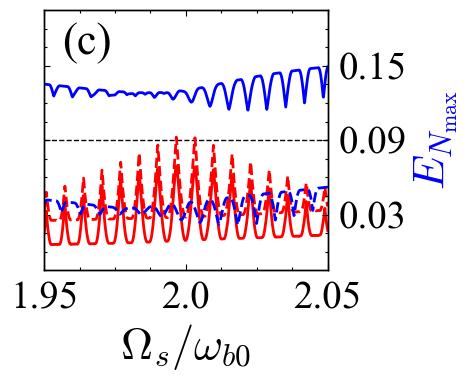

In [6]:
# all parameters
params = {
    'looper': {
        'show_progress': True,
        'X': {
            'var': 'Omegas',
            'idx': 2,
            'min': 1.95,
            'max': 2.05,
            'dim': 1001
        }
    },
    'solver': {
        'show_progress': False,
        'cache': True,
        'measure_codes': ['entan_ln'],
        'indices': (0, 2),
        'ode_method': 'vode',
        't_min': 0.0,
        't_max': 1000.0,
        't_dim': 10001,
        't_index_min': 9371,
        't_index_max': 10001
    },
    'system': {
        'A_ls': [100.0, 10.0, 10.0],
        'A_vs': [50.0, 50.0, 50.0], 
        'Delta_0': 1.0,
        'gammas': [0.1, 1e-6, 1e-2],
        'gs': [1e-3, 2e-4],
        'n_ths': [0.0, 0.0],
        'Omegas': [2.0, 2.0, 2.0],
        'omega_c0': 1.1,
        'theta': 0.5,
        't_mod': 'cos',
        't_pos': 'top'
    },
    'plotter': {
        'type': 'lines',
        'colors': ['k'] + ['r'] * 2 + ['b'] * 2,
        'sizes': [1] + [2] * 4,
        'styles': ['--'] + ['--', '-'] * 2,
        'x_label': '$\\Omega_{s} / \\omega_{b0}$',
        'x_ticks': [1.95 + i * 0.05 for i in range(3)],
        'x_ticks_minor': [1.95 + i * 0.0125 for i in range(9)],
        'v_label': '',
        'v_label_color': 'r',
        'v_limits': [0.325, 0.675],
        'v_tick_labels': [''] * 3,
        'v_tick_position': 'left-in',
        'v_ticks': [0.4, 0.5, 0.6],
        'v_ticks_minor': [0.325 + i * 0.025 for i in range(14)],
        'v_twin_label': '$E_{N_{\\mathrm{max}}}$',
        'v_twin_label_color': 'b',
        'v_twin_limits': [-0.015, 0.195],
        'v_twin_tick_position': 'right-in',
        'v_twin_ticks': [0.03, 0.09, 0.15],
        'v_twin_ticks_minor': [i * 0.015 for i in range(14)],
        'label_font_size': 32,
        'tick_font_size': 28,
        'width': 4.8,
        'height': 4.0,
        'annotations': [{
            'text': '(c)',
            'xy': [0.13, 0.82]
        }]
    }
}

# function to obtain squeezing and entanglement
def func(system_params):
    # initialize system
    system = OEM_20(
        params=system_params
    )

    # initialize solver
    hle_solver = HLESolver(
        system=system,
        params=params['solver']
    )
    # get modes and correlations
    Modes, Corrs = hle_solver.get_modes_corrs()
    # get quantum correlation measures
    Measures = QCMSolver(
        Modes=Modes,
        Corrs=Corrs,
        params=params['solver']
    ).get_measures()
    # extract maximum squeezing
    m_0 = np.min(Corrs[:, 2, 2])
    # extract maximum entanglement
    m_1 = np.max(Measures[:, 0])

    # return results as array
    return np.array([m_0, m_1], dtype=np.float_)

# without voltage modulation
params['looper']['file_path_prefix'] = '../../data/v4.0_qom-v1.0.0/3c_A_vs=[50.0, 0.0, 0.0]'
params['system']['A_vs'] = [50.0, 0.0, 0.0]
looper_0 = wrap_looper(
    looper_name='XLooper',
    func=func,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
Sq_0, En_0 = np.transpose(looper_0.results['V'])

# with voltage modulation
params['looper']['file_path_prefix'] = '../../data/v4.0_qom-v1.0.0/3c_A_vs=[50.0, 50.0, 50.0]'
params['system']['A_vs'] = [50.0, 50.0, 50.0]
looper_1 = wrap_looper(
    looper_name='XLooper',
    func=func,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
Sq_1, En_1 = np.transpose(looper_1.results['V'])

# plotter
X = looper_0.axes['X']['val']
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
# plot squeezing dynamics
plotter.update(
    vs=[np.zeros(np.shape(X)) + 0.5, Sq_0, Sq_1],
    xs=X
)
# plot entanglement dynamics
plotter.update_twin_axis(
    vs=[En_0, En_1],
    xs=X
)
# show
plotter.show()